# Introduction

In this project we'll analyze exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project we will be answering the following questions to the stakeholders:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We'll be using data from two differents datasets. The first one, dete_survey, has the following columns:

- __ID__: An id used to identify the participant of the survey
- __SeparationType__: The reason why the person's employment ended
- __Cease Date__: The year or month the person's employment ended
- __DETE Start Date__: The year the person began employment with the DETE

The second dataset has the following columns:

- __Record ID__: An id used to identify the participant of the survey
- __Reason for ceasing employment__: The reason why the person's employment ended
- __LengthofServiceOverall. Overall Length of Service at Institute (in years)__: The length of the person's employment (in years)

Using these two datasets we are able to answer the questions that were asked previously.

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np

In [2]:
#Reading datasets
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

###### Showing info about the dete_survey dataframe

In [3]:
#Info
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
#head
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
dete_survey.shape

(822, 56)

We can see that the dataset has some columns with an amount of NaN values. These values need to be care of. Let's in percentage how much these values represent.

In [7]:
nan_values_dete = dete_survey.isnull().sum()

In [8]:
t = nan_values_dete > 0

In [9]:
#We divide the number of NaN from each column by the total number of rows
#from Dete Survey and multiply the result by 100.
new_t_df = pd.DataFrame(nan_values_dete[t])

In [10]:
#Converting to a dataframe
#We divide the number of NaN from each column by the total number of rows
#from Dete Survey and multiply the result by 100.
new_t_df = nan_values_dete[t].to_frame().reset_index()
new_t_df.rename({'index':'Columns',0:'Values'}, axis=1, inplace=True)
new_t_df['Percentage'] = round((new_t_df['Values']/dete_survey.shape[0])*100, 2)

In [11]:
#The percentages
new_t_df

,Columns,Values,Percentage
0,Position,5,0.61
1,Classification,367,44.65
2,Business Unit,696,84.67
3,Employment Status,5,0.61
4,Professional Development,14,1.70
5,Opportunities for promotion,87,10.58
6,Staff morale,6,0.73
7,Workplace issue,34,4.14
8,Physical environment,5,0.61
9,Worklife balance,7,0.85


So, from the values above we can see that we have some columns with 99% of NaN values. In the next steps we are going to solve this problem.

###### Showing info about the tafe_survey dataframe

In [12]:
#Info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [13]:
#head
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Checking null values
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [15]:
tafe_survey.shape

(702, 72)

We can see that the dataset has some columns with an amount of NaN values. These values need to be care of. Let's in percentage how much these values represent.

In [16]:
nan_values_tafe = tafe_survey.isnull().sum()

In [17]:
t_tafe = nan_values_tafe > 0

In [18]:
#We divide the number of NaN from each column by the total number of rows
#from Dete Survey and multiply the result by 100.
new_t_tafe_df = pd.DataFrame(nan_values_tafe[t_tafe])

In [19]:
#Converting to a dataframe
#We divide the number of NaN from each column by the total number of rows
#from Dete Survey and multiply the result by 100.
new_t_tafe_df = nan_values_tafe[t_tafe].to_frame().reset_index()
new_t_tafe_df.rename({'index':'Columns',0:'Values'}, axis=1, inplace=True)
new_t_tafe_df['Percentage'] = round((new_t_tafe_df['Values']/tafe_survey.shape[0])*100, 2)

In [20]:
#The percentages
new_t_tafe_df

,Columns,Values,Percentage
0,CESSATION YEAR,7,1.00
1,Reason for ceasing employment,1,0.14
2,Contributing Factors. Career Move - Public Sec...,265,37.75
3,Contributing Factors. Career Move - Private Se...,265,37.75
4,Contributing Factors. Career Move - Self-emplo...,265,37.75
5,Contributing Factors. Ill Health,265,37.75
6,Contributing Factors. Maternity/Family,265,37.75
7,Contributing Factors. Dissatisfaction,265,37.75
8,Contributing Factors. Job Dissatisfaction,265,37.75
9,Contributing Factors. Interpersonal Conflict,265,37.75


So, from the values above we can see that we have column with 83.90% of NaN values. In the next steps we are going to solve this problem.

# Identify Missing Values and Drop Unnecessary Columns

From what we did in the previous screen, we can make the following observations:

- The __dete_survey__ dataframe contains __'Not Stated'__ values that indicate values are missing, but they aren't represented as __NaN__.

- Both the __dete_survey__ and __tafe_survey__ dataframes contain many columns that we don't need to complete our analysis.

- Each dataframe contains many of the same columns, but the column names are different.

- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

Let's handle the first two issues.

Let's read the dete_survey again but this time we are going to read the __'Not Stated'__ values in as __NaN__.

In [21]:
#Reading the dete_survey again
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')

Now we need drop some columns from the dete_survey dataset. We are going to drop the columns from 28 to 49 index. We don't need these columns to perform the analysis, so, let's get rid of them.

In [22]:
#Dropping some unnecessary columns from dete_survey dataset
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)

Let's do the same for the tafe_survey dataset.

In [23]:
#Dropping some unnecessary columns from tafe_survey dataset
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66])

# Clean Column Names

Now, let's pay attention to the column names. Each dataframe contains many of the same columns, but the column names are different. For example: in date_survey we have ID column and in tafe_survey we have Record ID Column. We need that the column names to be the same in both datasets, eventually we want to combine them, we need to standardize them.

In [24]:
#How they were
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [25]:
#Capitalization lowercase, removing spaces from the end of the strings
#and replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [26]:
#The new columns names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [27]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [28]:
#Let's rename the columns for the tafe_survey dataset
new_names = {'Record ID':'id', 'CESSATION YEAR': 'cease_date', 
            'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender', 
            'CurrentAge. Current Age': 'age',
            'Employment Type. Employment Type': 'employment_status',
            'Classification. Classification': 'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns=new_names)

In [29]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


# Filter the Data

So, previously we renamed the columns that we'll usue in our analysis. Now, let's remove more of the data we don't need.

Our aim here is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

To do so, we need to look at the __separationtype__ column in each dataframe. We'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who __resigned__. Let's see.

In [30]:
#separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [31]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [32]:
#Let's copy the dete_survey dataset with the three types of Resignation
rows_query = ['Resignation-Other reasons', 'Resignation-Other employer',
               'Resignation-Move overseas/interstate']

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(rows_query)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

In [33]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [34]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [35]:
#Rename the different Resignation values from dete_resignations
#to only Resignation
dete_resignations['separationtype'] = dete_resignations['separationtype'].str.split('-').str[0]

In [36]:
#The new result
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


# Verify the Data

Before we start cleaning and manipulating the rest of the data, let's verify that the data doesn't contain any major inconsistencies.

Let's verify that the year in the __cease_date__ and __dete_start_date__ columns make sense. It wouldn't make sense to have years after the current date.

In [37]:
#Let's clean the years from cease_date column
dete_resignations['cease_date']

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
        ...   
747    01/2014
751    12/2013
752    11/2013
753    11/2013
755    12/2013
762    07/2006
766    01/2014
769    11/2013
770        NaN
771    01/2014
774        NaN
784    10/2013
786    01/2014
788        NaN
789    01/2014
790    01/2014
791        NaN
794    11/2013
797        NaN
798        NaN
802    12/2013
803    01/2014
804    01/2014
806    12/2013
807    12/2013
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object

In [38]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [39]:
#Extracting the years
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:]

In [40]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [41]:
#Converting from int to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].dtypes

dtype('float64')

In [42]:
#Columns dete_start_date
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

It's all good!

In [43]:
#The cease_date column from tafe_resignations
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

It's look good as well!

# Create a new column

From the work we did, we can verify:

1. There aren't any major issues with the years.
2. The years in each dataframe don't span quite the same number of years.

We'll use the years in the __dete_resignations__ to create a new column, this column will have the lenghth of time the employee spent in their workplace.

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [45]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees

In this part we'll use the columns below to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    - __Contributing Factors. Dissatisfaction__
    - __Contributing Factors. Job Dissatisfaction__
2. dafe_survey_updated:
    - __job_dissatisfaction__
    - __dissatisfaction_with_the_department__
    - __physical_work_environment__
    - __lack_of_recognition__
    - __lack_of_job_security__
    - __work_location__
    - __employment_conditions__
    - __work_life_balance__
    - __workload__
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as __dissatisfied__ in a new column.

In [46]:
#Let's count the values in the 
#'Contributing Factors. Dissatisfaction' and 
#'Contributing Factors. Job Dissatisfaction' columns
#from tafe_resignations
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [47]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [48]:
#Let's create a functio to update these values to
#True, False or NaN Values
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

In [49]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition',
                                                       'lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions',
                                                       'work_life_balance',
                                                       'workload']].applymap(update_vals).any(axis=1, skipna=False)

In [51]:
#Let's create a copy out of the old dataframes
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [52]:
#Let's verify our data - check it out the last column (dissatisfied)
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True


In [53]:
#Let's verify our data - check it out the last column (dissatisfied)
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


# Combine the Data

The road so far.. (Siri play Carry on Wayward Son by Kansas).

What we did:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new __institute_service__ column
- Cleaned the __Contributing Factors__ columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets. We are goint to aggregate the data according to the __institute_service__ column.

In [54]:
#Let's add a column to the two dataframes that will allow us
#to easily distinguish between the two
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [55]:
#Combining the two datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [56]:
#Let's drop columns with less than 500 non null values
combined.notnull().sum().sort_values(ascending=False)

institute                                              651
separationtype                                         651
id                                                     651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
Institute                                              340
WorkArea                                               340
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Ill Health                       3

In [57]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [58]:
combined_updated.notnull().sum().sort_values(ascending=False)

separationtype       651
institute            651
id                   651
dissatisfied         643
cease_date           635
position             598
employment_status    597
age                  596
gender               592
institute_service    563
dtype: int64

# Clean the Service Column

We are almost close to perform some analysis. But first, we'll have to clean up the __institute_service__ column.

This column is tricky to clean because it currently contains values in a couple different forms. Look at the output below.

In [59]:
#Institute service column values
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


We'll convert these numbers into categories. We'll use the definitons below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [60]:
#Extracting years of service from each value in the 
#institute_service column
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [61]:
# Checking if the  values are correct
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [62]:
#Let's create a function that maps each year value
def map_years(value):
    if pd.isnull(value):
        return np.nan
    elif (value < 3):
        return 'New'
    elif (value >= 3 and value <=6):
        return 'Experienced'
    elif (value >= 7 and value <=10):
        return 'Established'
    else:
        return 'Veteran'

In [63]:
#Mapping the year value
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_years)

In [64]:
#The result
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Perform Initial Analysis

Let's finally do our first piece of analysis. This is meant to be an initial introduction to analysis, no the final analysis, we still have additional missing values left to deal with.

In [65]:
#Count values for the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [66]:
#Fill NaN with the most common value, in the case will be False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [67]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    249
Name: dissatisfied, dtype: int64

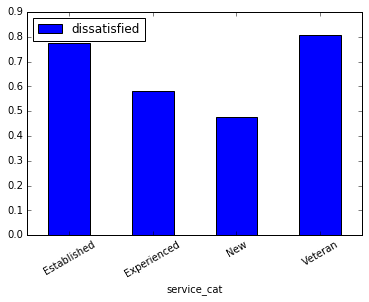

In [68]:
#Calculating the percentage of dissatisfied employees in each
#service_cat group
dissa_empl = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#Barplot
%matplotlib inline
dissa_empl.plot(kind='bar', rot=30)

We can conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.